## Members: Xiwen Chen, Yifei Zhang, Ai Zhang

In [12]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from pandas import Series,DataFrame

### Reuqest the page

In [13]:
result = requests.get("https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population_density")



### Scrap HTML

In [14]:
content = result.content
soup=BeautifulSoup(content, "html.parser")


In [15]:
soup.title.string

'List of countries and dependencies by population density - Wikipedia'

### Find the table, and get the required information
- `strip()`and `replace(',','')` to modify the `str` that can be convert to flaot or int 
- Use diffenret lists to store the information of each column
- Skip Country name containing `world`

In [16]:
tables = soup.find('table', class_= 'sortable')
trs = tables.find_all('tr')
Countries = []
Km2s = []
mi2s = []
Populations = []

for i in range(len(trs)): 
    tr = trs[i]
    if i != 0 and i != 1 and i != len(trs) and i != len(trs)-1 and i != len(trs)-2:
        cells = tr.find_all('th')
        if not cells:
            cells=tr.find_all('td')
        Country = cells[1].get_text().strip()
        Km2 = cells[2].get_text().strip().replace(',','')
        mi2 = cells[3].get_text().strip().replace(',','')
        Population = cells[4].get_text().strip().replace(',','')
        if 'World' not in Country:
            Countries.append(Country)
            Km2s.append(float(Km2))
            mi2s.append(float(mi2))
            Populations.append(int(Population))
        #for cell in cells:
         #   print(cell.get_text(),end='|')


### Use pandas to generate dataframe

In [17]:
data = {'Country':Countries,'Area (km2)':Km2s,'Area (mi2)':mi2s,'Population':Populations}
df = DataFrame(data)
df

,Country,Area (km2),Area (mi2),Population
0,Macau (China),115.30,45.00,696100
1,Monaco,2.02,0.78,38300
2,Singapore,722.50,279.00,5703600
3,Hong Kong (China),1106.00,427.00,7500700
4,Gibraltar (United Kingdom),6.80,2.60,33701
...,...,...,...,...
246,Mongolia,1564100.00,603902.00,3238479
247,Pitcairn Islands (United Kingdom),47.30,18.00,56
248,Falkland Islands (United Kingdom),12173.00,4700.00,2563
249,Svalbard and Jan Mayen (Norway),61399.00,23706.00,2655


In [18]:
type(df)

pandas.core.frame.DataFrame

### Summary

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 4 columns):
Country       251 non-null object
Area (km2)    251 non-null float64
Area (mi2)    251 non-null float64
Population    251 non-null int64
dtypes: float64(2), int64(1), object(1)
memory usage: 8.0+ KB


In [20]:
df.describe(include = "all")

,Country,Area (km2),Area (mi2),Population
count,251,2.510000e+02,2.510000e+02,2.510000e+02
unique,251,NaN,NaN,NaN
top,Dominica,NaN,NaN,NaN
freq,1,NaN,NaN,NaN
mean,NaN,5.432938e+05,2.097769e+05,3.047293e+07
std,NaN,1.716009e+06,6.625517e+05,1.283047e+08
min,NaN,4.900000e-01,1.900000e-01,5.600000e+01
25%,NaN,1.590200e+03,6.740000e+02,2.638290e+05
50%,NaN,6.456200e+04,2.492800e+04,4.475353e+06
75%,NaN,3.495840e+05,1.349750e+05,1.764158e+07


In [21]:
df.corr(method='pearson', min_periods=1)

,Area (km2),Area (mi2),Population
Area (km2),1.00000,1.000000,0.459150
Area (mi2),1.00000,1.000000,0.459149
Population,0.45915,0.459149,1.000000


### Scatterplot

(0.0, 1475440047.2)

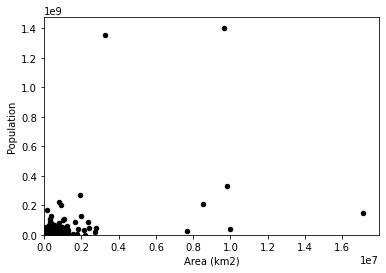

In [22]:
import matplotlib.pyplot as plt
Scatterplot  = df.plot.scatter(x = "Area (km2)", y = "Population",c= "black")
Scatterplot.set_xlim(0)
Scatterplot.set_ylim(0) 